In [39]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Loading the "dataset"
df=pd.read_excel('assembled_data_scrapped_9sept.xlsx')
df.head()

,crawled_link,original_url,text,labels,scrapped_content
0,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... and workers' compensation clients maximize...,0,Virginia Personal Injury & Workers Comp Attorn...
1,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,"... Testimonials ""I am extremely satisfied wit...",0,Virginia Personal Injury & Workers Comp Attorn...
2,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...
3,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...
4,https://3810641.findlaw3.flsitebuilder.com/,https://3810641.findlaw3.flsitebuilder.com/,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...


In [5]:
# Checking the values present in the the "text feature" of dataframe - first entry or 0th index
df['text'][0]

"... and workers' compensation clients maximize their financial compensation. ... At Parthemos & Curran, PLLC, we understand that recovering from an ... injury is a costly process. From medical bills to lost wages, ... Our lawyers are committed to maximizing the monetary damages that our clients ... If you were hurt as a result of another person's carelessness, recklessness or intentional action, then you should not be burdened with the expenses related to recuperation. Our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay.... Virginia and federal laws require that employers maintain safe work sites\xa0... Our Virginia workers' compensation lawyers know how to hold employers ... liable when workers suffer injuries while on the job. ... We receive no legal fees until our team recovers compensation for you.... Experiencing an auto accident is painful and stressful. Mr. Curran and Ms.... sure

In [6]:
# Checking the "rows" and "columns" present in the dataset
df.shape

(1418, 5)

In [7]:
# Checking the count of "categories" present in the "labels" feature
df['labels'].value_counts()

0    1136
1     282
Name: labels, dtype: int64

# EDA

In [8]:
#Dropping the columns "crawled_link" and "original url" as we dono't need these because we have the features scrapped and "plag_text" was already present
column_name=['crawled_link', 'original_url']
df1=df.drop(columns=column_name)
df1.head()

,text,labels,scrapped_content
0,... and workers' compensation clients maximize...,0,Virginia Personal Injury & Workers Comp Attorn...
1,"... Testimonials ""I am extremely satisfied wit...",0,Virginia Personal Injury & Workers Comp Attorn...
2,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...
3,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...
4,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...


In [9]:
# Checking the first record present in the "text features of dataframe"
df1['text'][0]

"... and workers' compensation clients maximize their financial compensation. ... At Parthemos & Curran, PLLC, we understand that recovering from an ... injury is a costly process. From medical bills to lost wages, ... Our lawyers are committed to maximizing the monetary damages that our clients ... If you were hurt as a result of another person's carelessness, recklessness or intentional action, then you should not be burdened with the expenses related to recuperation. Our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay.... Virginia and federal laws require that employers maintain safe work sites\xa0... Our Virginia workers' compensation lawyers know how to hold employers ... liable when workers suffer injuries while on the job. ... We receive no legal fees until our team recovers compensation for you.... Experiencing an auto accident is painful and stressful. Mr. Curran and Ms.... sure

In [10]:
df1['labels'].value_counts()

# 0- Not Plagiarized
# 1- Plagiarized
# 2- May or May not be Plagiarized

0    1136
1     282
Name: labels, dtype: int64

In [11]:
#Checking Null Values
print(df1.isnull().sum())
print(df1.shape)

#Getting null values in the "scrapped_content" column. While scrapping the content from the website, there were some websites from where we were not able to get the content

text                0
labels              0
scrapped_content    1
dtype: int64
(1418, 3)


In [12]:
df2=df1.dropna()
df2.shape

(1417, 3)

In [13]:
df2['labels'].value_counts()

0    1135
1     282
Name: labels, dtype: int64

CLEANING THE DATAFRAME

Backslashes (\) are used in regular expressions (regex) to escape certain characters and create special sequences. The reason for using backslashes in regular expressions is to distinguish between literal characters and special characters or character classes. Here's why we use backslashes:

Escaping Special Characters: In regex, several characters have special meanings. For example:

. matches any character.
* matches zero or more of the preceding character or group.
+ matches one or more of the preceding character or group.
? matches zero or one of the preceding character or group.
| represents alternation (OR).
To match these characters literally, you need to escape them with a backslash. For instance, to match a literal period (.), you use \. in the regex.

Creating Character Classes: Backslashes are also used to create character classes. For example:

\d matches any digit (equivalent to [0-9]).
\w matches any word character (equivalent to [a-zA-Z0-9_]).
\s matches any whitespace character (spaces, tabs, newlines, etc.).
These predefined character classes are created by preceding the character (d, w, s) with a backslash.

Escaping the Backslash Itself: If you want to match a literal backslash in your regex pattern, you need to escape it with another backslash. So, \\ in the regex pattern matches a single backslash in the input string.

Here's an example to illustrate these concepts:

Suppose you want to match the string "abc.def". In a regex pattern, you would write it as "abc\.def". In this case:

abc is matched as literal characters.
\. is used to match a literal period, escaping its special meaning in regex.
def is matched as literal characters.
So, backslashes in regular expressions are used for escaping, creating character classes, and matching literal backslashes, helping you precisely define the patterns you want to match in your text data.

In [14]:
# Function to clean each sentence
import re
def clean_sentence(sentence):
    # Step 1: Remove extra spaces and "\xa0" (non-breaking space)
    #The \s represents any whitespace character, and the + means "one or more " like "tab".  | -> or condition
    #\xa0: This is like a secret code for a special character.
        #Double Backslashes (\): Think of these as a way to protect the secret code. It's like putting a shield around it so the computer knows it's not a regular character.
        #xa0: Inside the secret code, "xa0" is like a secret handshake that tells the computer, "Hey, this is a special character called a non-breaking space."
        # So, when you see \xa0, it's like telling the computer, "Look out for a special character that's a non-breaking space," and the double backslashes make sure the computer understands it's something special and not just regular text.
    cleaned_string = re.sub(r'\s+|\\xa0', ' ', sentence.lower()).strip()

    # Step 2: Remove all punctuation except "..." and "." (single full stop)
    # [^\w\s.]: This part of the pattern matches any character that is not a word character (\w), a whitespace character (\s), or a period (.). In regular expressions, ^ inside square brackets negates the character class, so [^\w\s.] matches characters that are NOT word characters, whitespace, or periods.
    #(?<!\.)\.\.(?!\.): This part of the pattern uses lookbehind (?<!\.) and lookahead (?!\.) assertions to match double periods .. that are not surrounded by periods. In other words, it matches .. only if it's not part of an ellipsis (...). The \. represents a literal period, and (?<!\.) checks that there is no period before .., and (?!\.) checks that there is no period after ...
    cleaned_string = re.sub(r'[^\w\s.]|(?<!\.)\.\.(?!\.)', '', cleaned_string)

    # Step 3: Split the string at occurrences of "...", ".", or any whitespace
    #cleaned_string: This is the input string that you want to process.

    #re.split(...): This is a method from the re module in Python used to split a string based on a regular expression pattern. In this case, it splits cleaned_string into a list of substrings using the specified pattern.

    #r'\.\.\.|(?<!\.)\.(?!\.)': This is the regular expression pattern used for splitting. Let's break it down:

    #\.\.\.: This part of the pattern matches three consecutive periods (...). The \. is used to escape the period character, and ... specifies the exact sequence to match.

    #|: This is the OR operator in regular expressions. It allows you to specify multiple patterns, and the input string is split if any of these patterns match.

    #(?<!\.)\.(?!\.): This part of the pattern uses lookbehind (?<!\.) and lookahead (?!\.) assertions to match single periods (.) that are not part of an ellipsis (...). The \. represents a literal period, and (?<!\.) checks that there is no period before the matched period, and (?!\.) checks that there is no period after the matched period.

    #[elem.strip() for elem in ...]: This is a list comprehension. It iterates over the substrings produced by re.split and applies the strip() method to each element (substring) to remove any leading or trailing whitespace. This ensures that the resulting list does not contain any unwanted spaces.

    #So, the code effectively splits cleaned_string into a list of substrings using the specified pattern. The pattern splits the string at occurrences of three consecutive periods (...) or single periods (.) that are not part of an ellipsis (...). After splitting, any leading or trailing whitespace in each substring is removed using strip(). The final result is stored in result_list, which is a list of cleaned substrings.






    result_list = [elem.strip() for elem in re.split(r'\.\.\.|(?<!\.)\.(?!\.)', cleaned_string)]

    # Remove any empty elements from the list and remove the full stop "." from each element
    result_list = [elem.replace('.', '') for elem in result_list if elem and elem != ' ']

    return result_list

# Apply the cleaning function to each element in the "text" column and store the results in a new column "plag_text"
df2['plag_text'] = df2['text'].apply(lambda x: clean_sentence(x))


In [16]:
df2['plag_text'][0]

['and workers compensation clients maximize their financial compensation',
 'at parthemos  curran pllc we understand that recovering from an',
 'injury is a costly process',
 'from medical bills to lost wages',
 'our lawyers are committed to maximizing the monetary damages that our clients',
 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation',
 'our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay',
 ' virginia and federal laws require that employers maintain safe work sites',
 'our virginia workers compensation lawyers know how to hold employers',
 'liable when workers suffer injuries while on the job',
 'we receive no legal fees until our team recovers compensation for you',
 ' experiencing an auto accident is painful and stressful',
 'mr',
 'curran and ms',
 ' sure b

In [17]:
# Function to clean each sentence
import re

def clean_sentence(sentence):
    # 1. Split the text at full stops
    sentences = sentence.split('.')

    # 2. Remove all punctuation marks and convert to lowercase, and remove extra spaces
    cleaned_sentences = [re.sub(r'[^\w\s]', '', s.lower()).strip() for s in sentences]

    # 3. Remove empty strings
    cleaned_sentences = list(filter(None, cleaned_sentences))

    # 4. Filter sentences with a length of at least 15 characters
    result_list = [elem for elem in cleaned_sentences if len(elem) >= 15]
    
    return result_list

# Apply the cleaning function to each element in the "scrapped_content" column and store the results in a new column "cleaned_content"
df2['original_text'] = df2['scrapped_content'].apply(lambda x: clean_sentence(x))


In [18]:
df2['original_text'][0]

['virginia personal injury  workers comp attorney  work injury winchester we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation',
 'contact us today we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation',
 'contact us today we proudly serve clients throughout northern virginia and the shenandoah valley',
 'our practice areas personal injury workers compensation effective representation in personal injury and workers compensation cases at parthemos curran buelow and polizzi pllc  we understand that recovering from an injury is a costly process',
 'from medical bills to lost wages there are a range of factors that put a strain on ones finances',
 'our lawyers are committed to maximizing the monetary damages that our clie

In [19]:
df2.head()

,text,labels,scrapped_content,plag_text,original_text
0,... and workers' compensation clients maximize...,0,Virginia Personal Injury & Workers Comp Attorn...,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorn...
1,"... Testimonials ""I am extremely satisfied wit...",0,Virginia Personal Injury & Workers Comp Attorn...,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorn...
2,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...
3,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...
4,... C. Michelle Buelow; Kate Gibson Polizzi; P...,0,Virginia Personal Injury & Workers Comp Attorn...,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...


In [20]:
df3=df2.drop(columns=['text','scrapped_content'],axis=1)
df3.head()

,labels,plag_text,original_text
0,0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorn...
1,0,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorn...
2,0,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...
3,0,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...
4,0,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...


In [21]:
print(df3['original_text'][0])

['virginia personal injury  workers comp attorney  work injury winchester we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation', 'contact us today we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation', 'contact us today we proudly serve clients throughout northern virginia and the shenandoah valley', 'our practice areas personal injury workers compensation effective representation in personal injury and workers compensation cases at parthemos curran buelow and polizzi pllc  we understand that recovering from an injury is a costly process', 'from medical bills to lost wages there are a range of factors that put a strain on ones finances', 'our lawyers are committed to maximizing the monetary damages that our clients r

In [22]:
print(df3['plag_text'][0])

['and workers compensation clients maximize their financial compensation', 'at parthemos  curran pllc we understand that recovering from an', 'injury is a costly process', 'from medical bills to lost wages', 'our lawyers are committed to maximizing the monetary damages that our clients', 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation', 'our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay', ' virginia and federal laws require that employers maintain safe work sites', 'our virginia workers compensation lawyers know how to hold employers', 'liable when workers suffer injuries while on the job', 'we receive no legal fees until our team recovers compensation for you', ' experiencing an auto accident is painful and stressful', 'mr', 'curran and ms', ' sure beats the 6000 

# FEATURE ENGINEERING

In [23]:
df_new=df3.copy()

In [24]:
import pandas as pd



# Create a copy of the original DataFrame
df_new= df3.copy()

# Step 1: Calculating the total number of words present in "plag_text"
df_new['total_words_plag'] =df_new['plag_text'].apply(lambda x: sum(len(sentence.split()) for sentence in x))

# Step 2: Calculating the total number of characters in "plag_text"
df_new['total_char_plag'] =df_new['plag_text'].apply(lambda x: sum(len(sentence) for sentence in x))

# Step 3: Calculating the total number of words present in "original_text"
df_new['total_words_original'] = df_new['original_text'].apply(lambda x: sum(len(sentence.split()) for sentence in x))

# Step 4: Calculating the total number of characters in "original_text"
df_new['total_char_original'] = df_new['original_text'].apply(lambda x: sum(len(sentence) for sentence in x))

# Step 5: Calculating the ratio of word count (plag_text / original_text)
df_new['ratio_word'] = df_new['total_words_plag'] /df_new['total_words_original']

# Step 6: Calculating the ratio of character count (plag_text / original_text)
df_new['ratio_char'] = df_new['total_char_plag'] / df_new['total_char_original']

# Step 7: Calculating the number of elements present in "original_text"
df_new['element_count_original'] = df_new['original_text'].apply(len)

# Step 8: Calculating the number of elements present in "plag_text"
df_new['element_count_plag'] = df_new['plag_text'].apply(len)

# Step 9: Calculating the ratio of element count (plag_text / original_text)
df_new['ratio_element'] = df_new['element_count_plag'] / df_new['element_count_original']


In [25]:
df_new.head()

,labels,plag_text,original_text,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,element_count_plag,ratio_element
0,0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorn...,157,972,446,2730,0.352018,0.356044,25,17,0.68
1,0,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorn...,54,296,446,2730,0.121076,0.108425,25,4,0.16
2,0,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,21,149,446,2730,0.047085,0.054579,25,3,0.12
3,0,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,21,149,446,2730,0.047085,0.054579,25,3,0.12
4,0,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,21,149,446,2730,0.047085,0.054579,25,3,0.12


In [26]:
# Calculate the similarity score for each row
def calculate_similarity_score(plag_text, original_text):
    similarity_percent = []
    for s2 in plag_text:
        found = False  # Use boolean flag instead of 0/1
        percent_match = 0
        for s1 in original_text:
            # If s2 is found in s1, calculate the similarity percentage
            if s1.find(s2) >= 0:
                percent_match = int(len(s2.split(" ")) / len(s1.split(" ")) * 100)
                found = True
                break
        if not found:  # Use 'not' instead of 'found == 0'
            print(s2)
        similarity_percent.append(percent_match)
    return similarity_percent

df_new['similarity_percent'] = df_new.apply(lambda row: calculate_similarity_score(row['plag_text'], row['original_text']), axis=1)

# Calculate count and percentage for similarity ranges
def calculate_similarity_ranges(similarity_list):
    count_100_similarity = sum(1 for element in similarity_list if element == 100)
    count_75_100_similarity = sum(1 for element in similarity_list if 75 <= element < 100)
    count_50_75_similarity = sum(1 for element in similarity_list if 50 <= element < 75)
    count_25_50_similarity = sum(1 for element in similarity_list if 25 <= element < 50)
    count_below_25_similarity = sum(1 for element in similarity_list if element < 25)
    
    total_elements = len(similarity_list)
    
    percentage_100_similarity = (count_100_similarity / total_elements) * 100
    percentage_75_100_similarity = (count_75_100_similarity / total_elements) * 100
    percentage_50_75_similarity = (count_50_75_similarity / total_elements) * 100
    percentage_25_50_similarity = (count_25_50_similarity / total_elements) * 100
    percentage_below_25_similarity = (count_below_25_similarity / total_elements) * 100
    
    return count_100_similarity, count_75_100_similarity, count_50_75_similarity, count_25_50_similarity, count_below_25_similarity, \
           percentage_100_similarity, percentage_75_100_similarity, percentage_50_75_similarity, percentage_25_50_similarity, \
           percentage_below_25_similarity

# Create a DataFrame with similarity counts and percentages
similarity_features = df_new['similarity_percent'].apply(calculate_similarity_ranges).apply(pd.Series)
similarity_features.columns = ['count_100_similarity', 'count_75_100_similarity', 'count_50_75_similarity', 'count_25_50_similarity', 'count_below_25_similarity',
                               'percentage_100_similarity', 'percentage_75_100_similarity', 'percentage_50_75_similarity', 'percentage_25_50_similarity', 'percentage_below_25_similarity']

# Concatenate the new DataFrame with the existing df_new
df_new = pd.concat([df_new, similarity_features], axis=1)



at parthemos  curran pllc we understand that recovering from an
curran and ms
testimonials i am extremely satisfied with how they handled my case with professionalism and compassion
michelle buelow kate gibson polizzi practice areas
personal injury workers compensation wrongful death real estate and transactional law blog contact
michelle buelow kate gibson polizzi practice areas
personal injury workers compensation wrongful death real estate and transactional law blog contact
michelle buelow kate gibson polizzi practice areas
personal injury workers compensation wrongful death real estate and transactional law blog contact
michelle buelow kate gibson polizzi practice areas
personal injury workers compensation wrongful death real estate and transactional law blog contact
michelle buelow kate gibson polizzi practice areas
personal injury workers compensation wrongful death real estate and transactional law blog contact
at parthemos  curran pllc we proudly serve clients throughout northe

In [27]:
similarity_features.head()

,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,2.0,0.0,5.0,3.0,7.0,11.764706,0.0,29.411765,17.647059,41.176471
1,0.0,2.0,0.0,1.0,1.0,0.000000,50.0,0.000000,25.000000,25.000000
2,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
3,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
4,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000


In [28]:
pd.set_option('display.max_rows', None)
df_new.head()

,labels,plag_text,original_text,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,...,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorn...,157,972,446,2730,0.352018,0.356044,25,...,2.0,0.0,5.0,3.0,7.0,11.764706,0.0,29.411765,17.647059,41.176471
1,0,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorn...,54,296,446,2730,0.121076,0.108425,25,...,0.0,2.0,0.0,1.0,1.0,0.000000,50.0,0.000000,25.000000,25.000000
2,0,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,21,149,446,2730,0.047085,0.054579,25,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
3,0,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,21,149,446,2730,0.047085,0.054579,25,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
4,0,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,21,149,446,2730,0.047085,0.054579,25,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000


In [29]:
df_new.keys()

Index(['labels', 'plag_text', 'original_text', 'total_words_plag',
       'total_char_plag', 'total_words_original', 'total_char_original',
       'ratio_word', 'ratio_char', 'element_count_original',
       'element_count_plag', 'ratio_element', 'similarity_percent',
       'count_100_similarity', 'count_75_100_similarity',
       'count_50_75_similarity', 'count_25_50_similarity',
       'count_below_25_similarity', 'percentage_100_similarity',
       'percentage_75_100_similarity', 'percentage_50_75_similarity',
       'percentage_25_50_similarity', 'percentage_below_25_similarity'],
      dtype='object')

In [30]:
print(df_new.shape)
print(df_new['labels'].value_counts())

(1417, 23)
0    1135
1     282
Name: labels, dtype: int64


Calculating "Cosine Similarity"

In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [33]:
text_data=df_new[['plag_text','original_text']]

In [34]:
df_new['plag_text'][0]

['and workers compensation clients maximize their financial compensation',
 'at parthemos  curran pllc we understand that recovering from an',
 'injury is a costly process',
 'from medical bills to lost wages',
 'our lawyers are committed to maximizing the monetary damages that our clients',
 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation',
 'our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay',
 ' virginia and federal laws require that employers maintain safe work sites',
 'our virginia workers compensation lawyers know how to hold employers',
 'liable when workers suffer injuries while on the job',
 'we receive no legal fees until our team recovers compensation for you',
 ' experiencing an auto accident is painful and stressful',
 'mr',
 'curran and ms',
 ' sure b

In [35]:
def get_cosine_similarity(x):
    tfidf_vectorizer = TfidfVectorizer()

    # Join the lists of strings into single strings
    plag_text = ' '.join(x['plag_text'])
    original_text = ' '.join(x['original_text'])

    # Transform the joined strings using the vectorizer
    tfidf_matrix_plag = tfidf_vectorizer.fit_transform([plag_text])
    tfidf_matrix_orig = tfidf_vectorizer.transform([original_text])

    # Calculate the cosine similarity
    cosine_similarities = cosine_similarity(tfidf_matrix_plag, tfidf_matrix_orig)
    return cosine_similarities.diagonal()[0]

text_data['cosine_similarity2'] = text_data.apply(lambda x: get_cosine_similarity(x), axis=1)



In [36]:
text_data.head()

,plag_text,original_text,cosine_similarity2
0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorn...,0.893331
1,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorn...,0.890680
2,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,0.572293
3,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,0.572293
4,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,0.572293


In [37]:
text_data.head(20)

,plag_text,original_text,cosine_similarity2
0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorn...,0.893331
1,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorn...,0.890680
2,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,0.572293
3,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,0.572293
4,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,0.572293
5,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,0.572293
6,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,0.572293
7,[at parthemos curran pllc we proudly serve cl...,[winchester accident injury lawyers workers ...,0.714387
8,[av av preeminent martindalehubbell distinguis...,[winchester accident injury lawyers workers ...,0.775213
9,"[uniquely prepared, the law firm of parthemos ...",[winchester accident injury lawyers workers ...,0.719151


In [38]:
sorted_df = text_data.sort_values(by='cosine_similarity2', ascending=False)
sorted_df.head()

,plag_text,original_text,cosine_similarity2
1197,[7572092037 8004448485 8008328587 8033849480 8...,[midland credit management debt collection ag...,1.000000
681,"[httpswww, irs, govretirementplansplanparticip...",[qdro margolin neuner margolin neuner call u...,1.000000
807,[to have your attorney handle your legal matte...,[statement of clients rights ford obrien llp ...,0.963296
647,[in implementing the statewide uniform guideli...,[principles underlying the child support guide...,0.962462
1144,"[no results found, the page you requested coul...",[parent education center our family helping yo...,0.959403


In [39]:
print(text_data['plag_text'][0])

['and workers compensation clients maximize their financial compensation', 'at parthemos  curran pllc we understand that recovering from an', 'injury is a costly process', 'from medical bills to lost wages', 'our lawyers are committed to maximizing the monetary damages that our clients', 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation', 'our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay', ' virginia and federal laws require that employers maintain safe work sites', 'our virginia workers compensation lawyers know how to hold employers', 'liable when workers suffer injuries while on the job', 'we receive no legal fees until our team recovers compensation for you', ' experiencing an auto accident is painful and stressful', 'mr', 'curran and ms', ' sure beats the 6000 

In [40]:
print(text_data['original_text'][0])

['virginia personal injury  workers comp attorney  work injury winchester we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation', 'contact us today we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation', 'contact us today we proudly serve clients throughout northern virginia and the shenandoah valley', 'our practice areas personal injury workers compensation effective representation in personal injury and workers compensation cases at parthemos curran buelow and polizzi pllc  we understand that recovering from an injury is a costly process', 'from medical bills to lost wages there are a range of factors that put a strain on ones finances', 'our lawyers are committed to maximizing the monetary damages that our clients r

In [42]:
columns= ['plag_text','original_text','similarity_percent']
df_updated=df_new.drop(columns=columns, axis=1)
df_updated.head()

,labels,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,element_count_plag,ratio_element,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,0,157,972,446,2730,0.352018,0.356044,25,17,0.68,2.0,0.0,5.0,3.0,7.0,11.764706,0.0,29.411765,17.647059,41.176471
1,0,54,296,446,2730,0.121076,0.108425,25,4,0.16,0.0,2.0,0.0,1.0,1.0,0.000000,50.0,0.000000,25.000000,25.000000
2,0,21,149,446,2730,0.047085,0.054579,25,3,0.12,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
3,0,21,149,446,2730,0.047085,0.054579,25,3,0.12,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
4,0,21,149,446,2730,0.047085,0.054579,25,3,0.12,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000


In [43]:
df_updated.keys()

Index(['labels', 'total_words_plag', 'total_char_plag', 'total_words_original',
       'total_char_original', 'ratio_word', 'ratio_char',
       'element_count_original', 'element_count_plag', 'ratio_element',
       'count_100_similarity', 'count_75_100_similarity',
       'count_50_75_similarity', 'count_25_50_similarity',
       'count_below_25_similarity', 'percentage_100_similarity',
       'percentage_75_100_similarity', 'percentage_50_75_similarity',
       'percentage_25_50_similarity', 'percentage_below_25_similarity'],
      dtype='object')

In [44]:
concatenated_df = pd.concat([text_data, df_updated], axis=1)
concatenated_df.head()

,plag_text,original_text,cosine_similarity2,labels,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,...,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,[and workers compensation clients maximize the...,[virginia personal injury workers comp attorn...,0.893331,0,157,972,446,2730,0.352018,0.356044,...,2.0,0.0,5.0,3.0,7.0,11.764706,0.0,29.411765,17.647059,41.176471
1,[testimonials i am extremely satisfied with ho...,[virginia personal injury workers comp attorn...,0.890680,0,54,296,446,2730,0.121076,0.108425,...,0.0,2.0,0.0,1.0,1.0,0.000000,50.0,0.000000,25.000000,25.000000
2,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,0.572293,0,21,149,446,2730,0.047085,0.054579,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
3,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,0.572293,0,21,149,446,2730,0.047085,0.054579,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
4,"[c, michelle buelow kate gibson polizzi practi...",[virginia personal injury workers comp attorn...,0.572293,0,21,149,446,2730,0.047085,0.054579,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000


In [45]:
final_df=concatenated_df.drop(['plag_text', 'original_text'], axis=1)
final_df.head()

,cosine_similarity2,labels,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,element_count_plag,...,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,0.893331,0,157,972,446,2730,0.352018,0.356044,25,17,...,2.0,0.0,5.0,3.0,7.0,11.764706,0.0,29.411765,17.647059,41.176471
1,0.890680,0,54,296,446,2730,0.121076,0.108425,25,4,...,0.0,2.0,0.0,1.0,1.0,0.000000,50.0,0.000000,25.000000,25.000000
2,0.572293,0,21,149,446,2730,0.047085,0.054579,25,3,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
3,0.572293,0,21,149,446,2730,0.047085,0.054579,25,3,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
4,0.572293,0,21,149,446,2730,0.047085,0.054579,25,3,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000


In [46]:
final_df.head(40)

,cosine_similarity2,labels,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,element_count_plag,...,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,0.893331,0,157,972,446,2730,0.352018,0.356044,25,17,...,2.0,0.0,5.0,3.0,7.0,11.764706,0.000000,29.411765,17.647059,41.176471
1,0.890680,0,54,296,446,2730,0.121076,0.108425,25,4,...,0.0,2.0,0.0,1.0,1.0,0.000000,50.000000,0.000000,25.000000,25.000000
2,0.572293,0,21,149,446,2730,0.047085,0.054579,25,3,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.000000,0.000000,0.000000,100.000000
3,0.572293,0,21,149,446,2730,0.047085,0.054579,25,3,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.000000,0.000000,0.000000,100.000000
4,0.572293,0,21,149,446,2730,0.047085,0.054579,25,3,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.000000,0.000000,0.000000,100.000000
5,0.572293,0,21,149,446,2730,0.047085,0.054579,25,3,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.000000,0.000000,0.000000,100.000000
6,0.572293,0,21,149,446,2730,0.047085,0.054579,25,3,...,0.0,0.0,0.0,0.0,3.0,0.000000,0.000000,0.000000,0.000000,100.000000
7,0.714387,0,104,648,445,2948,0.233708,0.219810,24,12,...,2.0,0.0,3.0,4.0,3.0,16.666667,0.000000,25.000000,33.333333,25.000000
8,0.775213,0,47,372,445,2948,0.105618,0.126187,24,4,...,2.0,0.0,0.0,0.0,2.0,50.000000,0.000000,0.000000,0.000000,50.000000
9,0.719151,0,51,304,445,2948,0.114607,0.103121,24,5,...,1.0,0.0,1.0,0.0,3.0,20.000000,0.000000,20.000000,0.000000,60.000000


In [47]:
final_df.shape

(1417, 21)

In [48]:
final_df.keys()

Index(['cosine_similarity2', 'labels', 'total_words_plag', 'total_char_plag',
       'total_words_original', 'total_char_original', 'ratio_word',
       'ratio_char', 'element_count_original', 'element_count_plag',
       'ratio_element', 'count_100_similarity', 'count_75_100_similarity',
       'count_50_75_similarity', 'count_25_50_similarity',
       'count_below_25_similarity', 'percentage_100_similarity',
       'percentage_75_100_similarity', 'percentage_50_75_similarity',
       'percentage_25_50_similarity', 'percentage_below_25_similarity'],
      dtype='object')

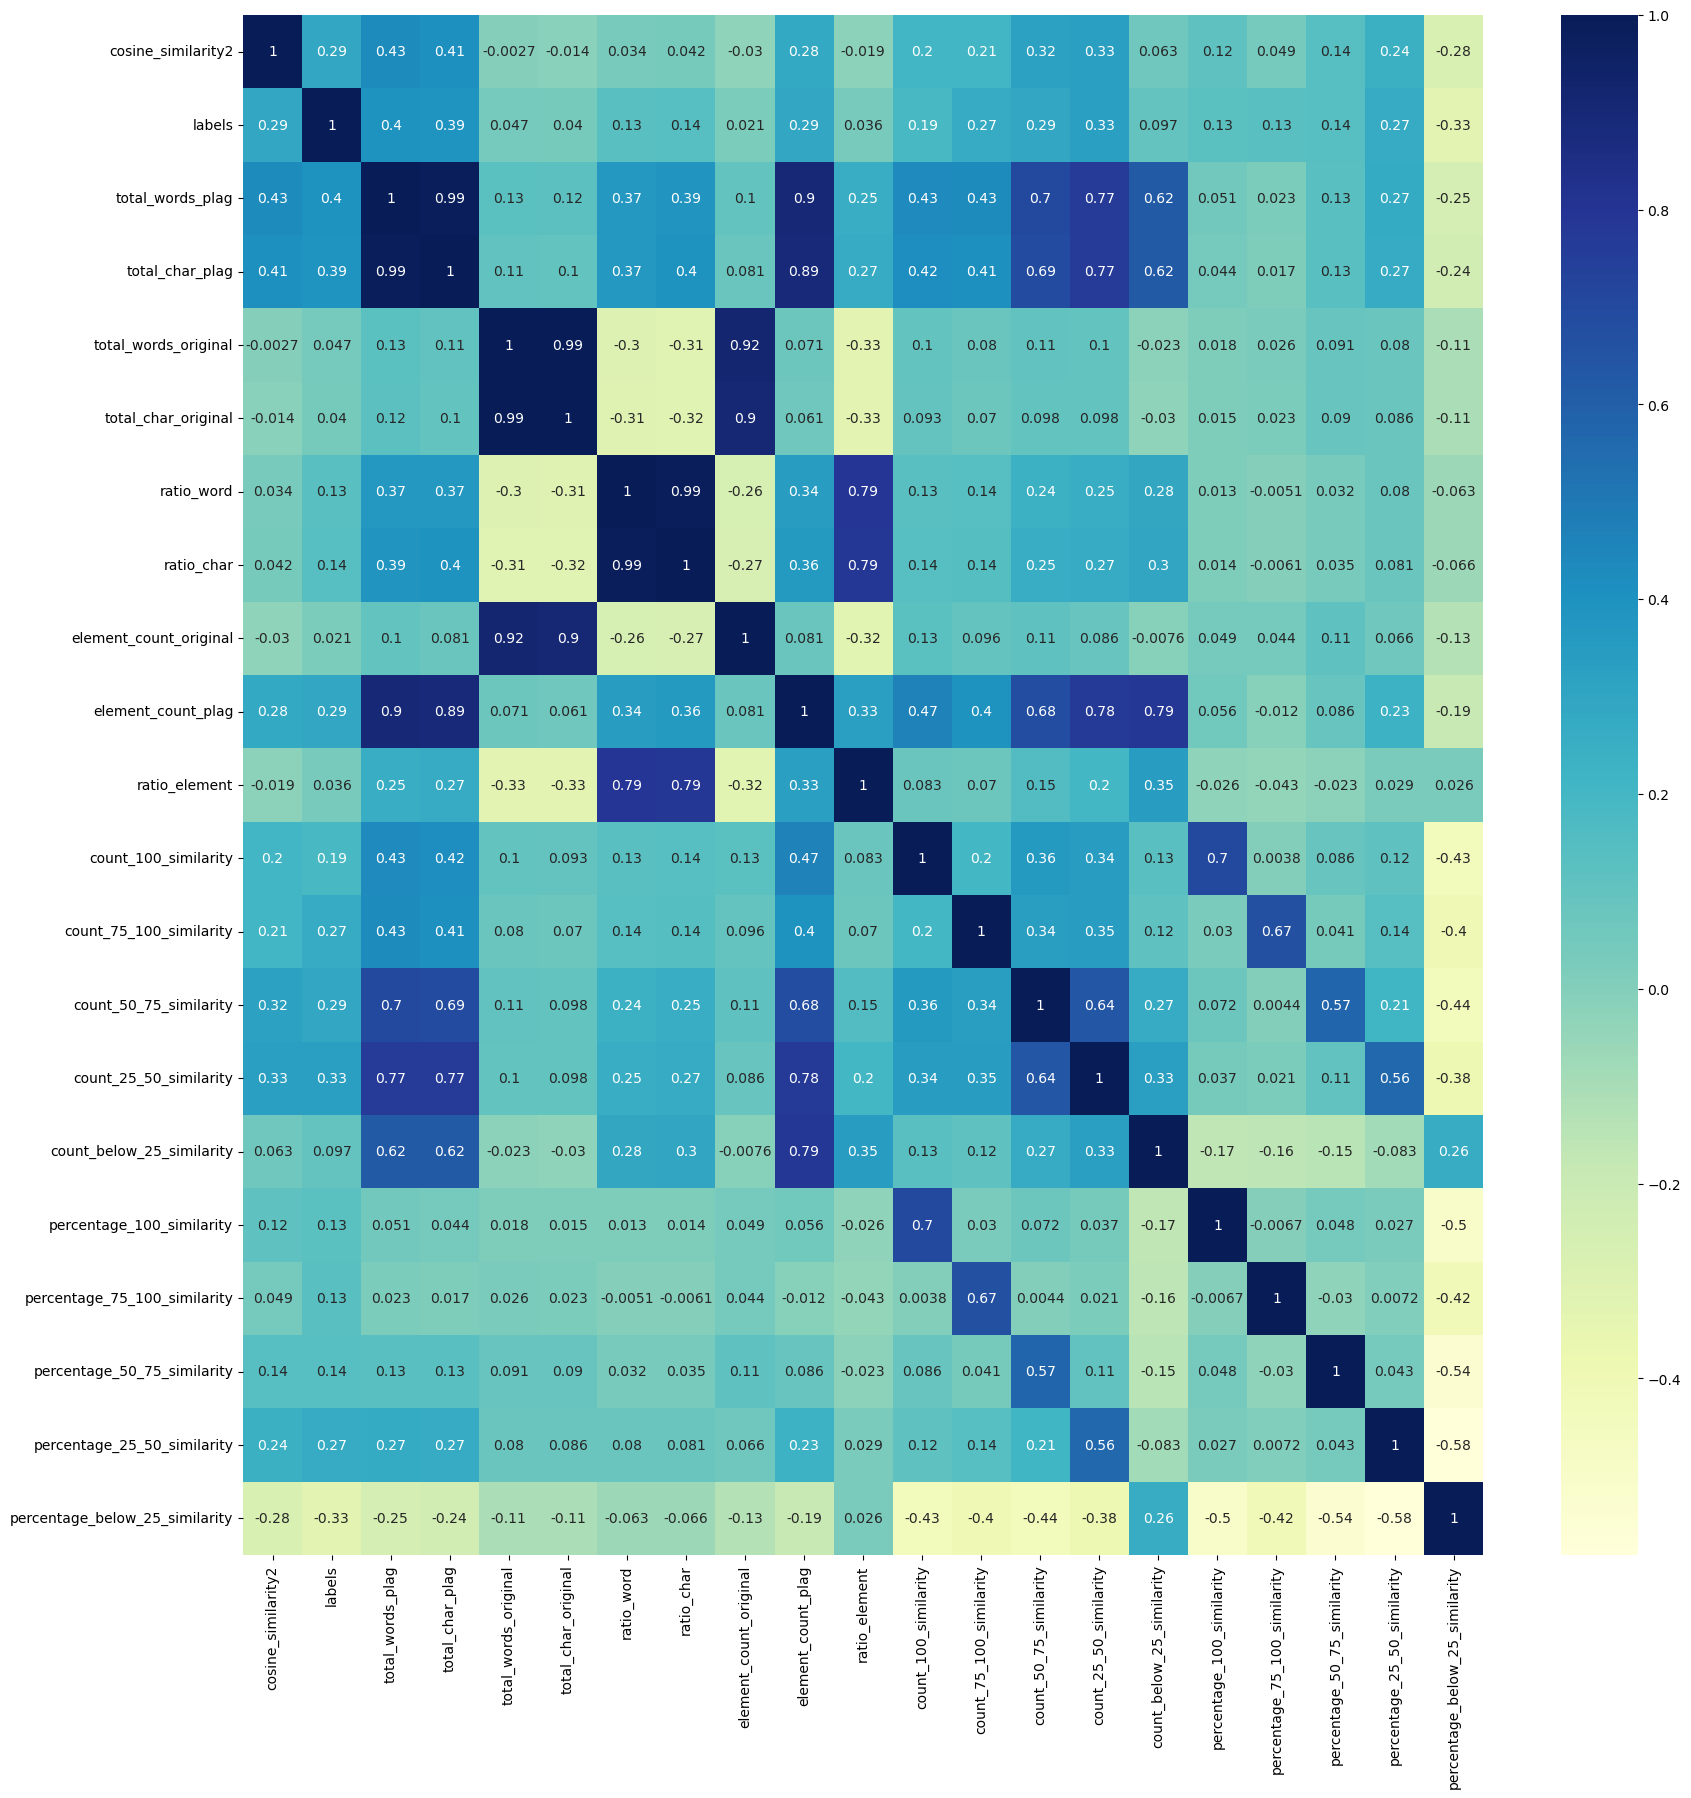

In [49]:
import seaborn as sns
plt.figure(figsize=(20,20))
dataplot = sns.heatmap(final_df.corr(), cmap="YlGnBu", annot=True)
  

plt.show()

In [50]:
X=final_df.drop(['labels'], axis=1)
X.head()

,cosine_similarity2,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,element_count_plag,ratio_element,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,0.893331,157,972,446,2730,0.352018,0.356044,25,17,0.68,2.0,0.0,5.0,3.0,7.0,11.764706,0.0,29.411765,17.647059,41.176471
1,0.890680,54,296,446,2730,0.121076,0.108425,25,4,0.16,0.0,2.0,0.0,1.0,1.0,0.000000,50.0,0.000000,25.000000,25.000000
2,0.572293,21,149,446,2730,0.047085,0.054579,25,3,0.12,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
3,0.572293,21,149,446,2730,0.047085,0.054579,25,3,0.12,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
4,0.572293,21,149,446,2730,0.047085,0.054579,25,3,0.12,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000


In [51]:
X.keys()

Index(['cosine_similarity2', 'total_words_plag', 'total_char_plag',
       'total_words_original', 'total_char_original', 'ratio_word',
       'ratio_char', 'element_count_original', 'element_count_plag',
       'ratio_element', 'count_100_similarity', 'count_75_100_similarity',
       'count_50_75_similarity', 'count_25_50_similarity',
       'count_below_25_similarity', 'percentage_100_similarity',
       'percentage_75_100_similarity', 'percentage_50_75_similarity',
       'percentage_25_50_similarity', 'percentage_below_25_similarity'],
      dtype='object')

In [52]:
y=final_df[['labels']]
y.head()

,labels
0,0
1,0
2,0
3,0
4,0


In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.20,random_state=42)

In [54]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1133, 20)
(284, 20)
(1133, 1)
(284, 1)


# MODEL BUILDING

MODEL 1 - RANDOM FOREST CLASSIFIER

In [55]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=7, max_depth=7)

In [56]:
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, n_estimators=7)

In [57]:
y_pred=model.predict(X_test)
y_pred

array([0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
      dtype=int64)

In [58]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.90      0.94      0.92       233
           1       0.64      0.53      0.58        51

    accuracy                           0.86       284
   macro avg       0.77      0.73      0.75       284
weighted avg       0.85      0.86      0.86       284



In [59]:
print(confusion_matrix(y_test,y_pred))

[[218  15]
 [ 24  27]]


In [61]:
# Checking accuracy for "training" - overfitting
y_pred_train=model.predict(X_train)

In [63]:
print(classification_report(y_train, y_pred_train))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95       902
           1       0.93      0.64      0.76       231

    accuracy                           0.92      1133
   macro avg       0.92      0.81      0.85      1133
weighted avg       0.92      0.92      0.91      1133



In [65]:
# Saving the data
import pickle
pickle.dump(model,open('model.pkl','wb'))

In [66]:
report = classification_report(y_test, y_pred, target_names=["Class 0", "Class 1"], output_dict=True)

In [67]:
accuracy = report["accuracy"]
print(f"Accuracy: {int(accuracy * 100)}%")


Accuracy: 86%


In [68]:
# Get precision and recall for Class 0
precision_class_0 = report["Class 0"]["precision"]
recall_class_0 = report["Class 0"]["recall"]

# Get precision and recall for Class 1
precision_class_1 = report["Class 1"]["precision"]
recall_class_1 = report["Class 1"]["recall"]

In [69]:
print(f"Precision for Class 0:{int(precision_class_0 * 100)}%")
print(f"Recall for Class 0: {int(recall_class_0 * 100)}%")
print(f"Precision for Class 1:{int(precision_class_1*100)}%")
print(f"Recall for Class 1: {int(recall_class_1 * 100)}%")

Precision for Class 0:90%
Recall for Class 0: 93%
Precision for Class 1:64%
Recall for Class 1: 52%


# To  show the "accuracy", "precision" and "recall"
- To show the results of accuracy, precision and recall on the website 
- I created an API for these
- To calculate these results, I captured all the "y_test" and "y_pred" in a ".json" file
- And, this ".json" file is then imported in the "VS Code" so that we can create a website which will show these results using Flask

In [70]:
# Assuming "y_test" is a DataFrame
y_test_list = y_test['labels'].to_list()

# Now, convert the list to a Pandas Series
y_test_series = pd.Series(y_test_list)


In [ ]:
import json
# Convert DataFrames to dictionaries
y_test_dict = y_test_series.to_list()
y_pred_list = y_pred.tolist()  # Convert NumPy array to a Python list

# Create a dictionary to store both y_test and y_pred
data_to_save = {
    "y_test": y_test_list,
    "y_pred": y_pred_list
}

# Save the data to a JSON file
with open("y_data.json", "w") as file:
    json.dump(data_to_save, file)

In [ ]:
calculate_metrics(y_test, y_pred)

PRECISION RECALL CURVE

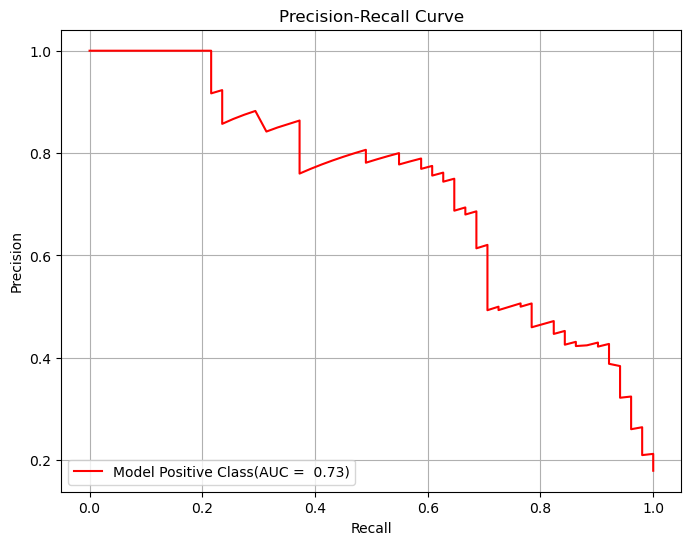

In [89]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

y_scores=model.predict_proba(X_test)[:,1]

precision, recall, thresholds = precision_recall_curve(y_test,y_scores)

auc_score = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='r', label=f'Model Positive Class(AUC = {auc_score: .2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


In [90]:
print(thresholds)

[0.01509507 0.02114834 0.02233827 0.02307884 0.02449356 0.02501933
 0.02769542 0.03076327 0.0310726  0.03187649 0.03532161 0.03535305
 0.03744169 0.03748637 0.03874704 0.03987025 0.04016177 0.04067704
 0.04068753 0.04376048 0.04411926 0.04565533 0.0467408  0.04754469
 0.04852132 0.04948519 0.05049549 0.05245052 0.0529245  0.05398659
 0.05445298 0.05543214 0.05553845 0.05589737 0.05594791 0.05636962
 0.06271411 0.06494322 0.06516727 0.06587218 0.06796081 0.07018757
 0.0730197  0.07652847 0.07898523 0.07946449 0.0805213  0.08103731
 0.08246179 0.0830861  0.08314422 0.08326568 0.08425423 0.08518231
 0.0852778  0.08697899 0.08851506 0.08931895 0.09125944 0.09341982
 0.09397997 0.09581971 0.09695821 0.09704785 0.09731271 0.09746315
 0.10003323 0.10131635 0.10197373 0.10328597 0.10398866 0.10413411
 0.10415304 0.10428169 0.108027   0.10985607 0.11136614 0.112734
 0.11313135 0.11361969 0.11918462 0.12433397 0.13280136 0.13646953
 0.13670828 0.13841284 0.14285714 0.1429555  0.14565533 0.148987

In [91]:
y_scores

array([0.09746315, 0.78072636, 0.08425423, 0.89631061, 0.05589737,
       0.48517268, 0.3157119 , 0.04411926, 0.1509209 , 0.82427177,
       0.2519693 , 0.09341982, 0.08246179, 0.05445298, 0.84089498,
       0.09695821, 0.04016177, 0.14902364, 0.13646953, 0.1429555 ,
       0.14565533, 0.02233827, 0.112734  , 0.09125944, 0.11918462,
       0.03187649, 0.40457527, 0.11313135, 0.09746315, 0.76176285,
       0.56570037, 0.15178571, 0.6540293 , 0.21174364, 0.91570037,
       0.27393268, 0.17777841, 0.3160576 , 0.1714887 , 0.02501933,
       0.0805213 , 0.09397997, 0.04948519, 0.13670828, 0.10328597,
       0.05398659, 0.7610542 , 0.34582684, 0.02501933, 0.91737288,
       0.02501933, 0.02501933, 0.02501933, 0.04068753, 0.19843718,
       0.0310726 , 0.03744169, 0.08314422, 0.4839461 , 0.02449356,
       0.10985607, 0.34848485, 0.11136614, 0.35938136, 0.02501933,
       0.14902364, 0.08518231, 0.06516727, 0.23345733, 0.11361969,
       0.62767094, 0.02501933, 0.81474577, 0.58061531, 0.15062

In [92]:
precision

array([0.17957746, 0.18021201, 0.18085106, 0.18149466, 0.18214286,
       0.18545455, 0.19615385, 0.1969112 , 0.19767442, 0.2       ,
       0.2007874 , 0.20158103, 0.20564516, 0.20816327, 0.20901639,
       0.2107438 , 0.21161826, 0.2125    , 0.21008403, 0.21367521,
       0.21459227, 0.21929825, 0.22026432, 0.22123894, 0.22222222,
       0.22321429, 0.22727273, 0.2283105 , 0.23041475, 0.23148148,
       0.23255814, 0.23696682, 0.23809524, 0.24154589, 0.24271845,
       0.24390244, 0.24509804, 0.24752475, 0.24875622, 0.26041667,
       0.2617801 , 0.26315789, 0.26455026, 0.2606383 , 0.26203209,
       0.26344086, 0.26486486, 0.26630435, 0.26923077, 0.27071823,
       0.2752809 , 0.27683616, 0.27840909, 0.28      , 0.2816092 ,
       0.28323699, 0.29518072, 0.2969697 , 0.29878049, 0.30434783,
       0.30625   , 0.31410256, 0.31612903, 0.31818182, 0.32450331,
       0.32214765, 0.32653061, 0.32876712, 0.33103448, 0.34042553,
       0.35036496, 0.35294118, 0.36090226, 0.36363636, 0.36641

In [93]:
recall

array([1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 0.98039216, 0.98039216,
       0.98039216, 0.98039216, 0.98039216, 0.98039216, 0.98039216,
       0.98039216, 0.98039216, 0.98039216, 0.98039216, 0.98039216,
       0.98039216, 0.98039216, 0.98039216, 0.98039216, 0.98039216,
       0.98039216, 0.98039216, 0.98039216, 0.98039216, 0.98039216,
       0.98039216, 0.98039216, 0.98039216, 0.96078431, 0.96078431,
       0.96078431, 0.96078431, 0.96078431, 0.96078431, 0.96078431,
       0.96078431, 0.96078431, 0.96078431, 0.96078431, 0.96078431,
       0.96078431, 0.96078431, 0.96078431, 0.96078431, 0.96078431,
       0.96078431, 0.96078431, 0.96078431, 0.96078431, 0.96078431,
       0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117647,
       0.94117647, 0.94117647, 0.94117647, 0.94117647, 0.94117

In [94]:
auc_score

0.728244271065367

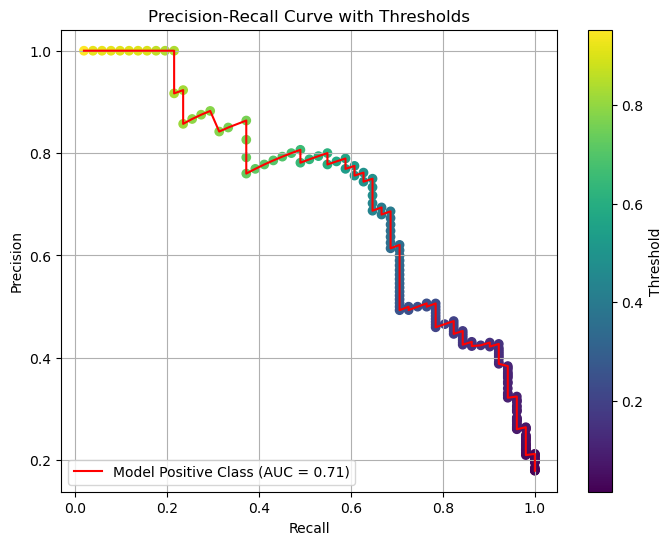

In [95]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve, auc

y_scores = model.predict_proba(X_test)[:, 1]

precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

precision = precision[:-1]
recall = recall[:-1]


auc_score= auc(recall, precision)


plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='r', label=f'Model Positive Class (AUC = {auc_score:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve with Thresholds')
plt.legend(loc='lower left')
plt.grid(True)

plt.scatter(recall, precision, c=thresholds, cmap='viridis', marker='o')
cbar = plt.colorbar()
cbar.set_label('Threshold')

plt.show()


In [96]:
threshold = 0.1

predicted_proba = model.predict_proba(X_test)
predicted = (predicted_proba [:,1] >= threshold).astype('int')

accuracy = accuracy_score(y_test, predicted)

In [97]:
accuracy

0.6408450704225352

In [98]:
print(classification_report(y_test,predicted))

              precision    recall  f1-score   support

           0       0.98      0.58      0.72       233
           1       0.33      0.94      0.48        51

    accuracy                           0.64       284
   macro avg       0.65      0.76      0.60       284
weighted avg       0.86      0.64      0.68       284



In [99]:
print(confusion_matrix(y_test,predicted))

[[134  99]
 [  3  48]]


In [100]:
model.feature_importances_

array([0.0582241 , 0.13796807, 0.14197339, 0.05609917, 0.04267075,
       0.05053305, 0.05393987, 0.04011041, 0.04109739, 0.05999856,
       0.00843836, 0.00892815, 0.01106336, 0.05381371, 0.02426634,
       0.02584362, 0.02272664, 0.03484316, 0.04513128, 0.08233063])

In [101]:
X.keys()

Index(['cosine_similarity2', 'total_words_plag', 'total_char_plag',
       'total_words_original', 'total_char_original', 'ratio_word',
       'ratio_char', 'element_count_original', 'element_count_plag',
       'ratio_element', 'count_100_similarity', 'count_75_100_similarity',
       'count_50_75_similarity', 'count_25_50_similarity',
       'count_below_25_similarity', 'percentage_100_similarity',
       'percentage_75_100_similarity', 'percentage_50_75_similarity',
       'percentage_25_50_similarity', 'percentage_below_25_similarity'],
      dtype='object')

In [102]:
# Creating the parameters to send to the model to get the required output

In [1]:
import requests
from bs4 import BeautifulSoup
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
scrap_raw_text={}
def scrape_content(url):
    try:
        headers = {
            "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36"
        }
        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')
            

            # Identify the heading and footer elements and exclude them
            heading = soup.find('header')
            footer = soup.find('footer')
            if heading:
                heading.extract()
            if footer:
                footer.extract()

            # Extract the remaining content
            content = soup.get_text(separator=' ')
            content = re.sub('\s+', ' ', content).strip()
            scrap_raw_text['text']=content
            
            # Split the content into separate elements based on full stops and new lines
            sentences = content.split('.')

            # Remove all punctuation marks and convert to lowercase, and remove extra spaces
            cleaned_sentences = [re.sub(r'[^\w\s]', '', s.lower()).strip() for s in sentences]

            # Remove empty strings
            cleaned_sentences = list(filter(None, cleaned_sentences))

            # Filter sentences with a length of at least 15 characters
            original_content = [elem for elem in cleaned_sentences if len(elem) >= 15]
            print(original_content)
            scrap_raw_text['content']=original_content
            return original_content
        else:
            print(f"Error: Unable to access {url}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Error: Unable to access {url}")
        return None

def plag_text(text_snippet):
    # Step 1: Remove extra spaces and "\xa0"(non-breaking space) 
    
    cleaned_string = re.sub(r'\s+|\\xa0', ' ', text_snippet).lower().strip()

    # Step 2: Remove all punctuation except "..." and "." (single full stop)
    cleaned_string = re.sub(r'[^\w\s.]|(?<!\.)\.\.(?!\.)', '', cleaned_string)

    # Step 3: Split the string at occurrences of "...", ".", or any whitespace
    result_list = [elem.strip() for elem in re.split(r'\.\.\.|(?<!\.)\.(?!\.)', cleaned_string)]

    # Remove any empty elements from the list and remove the full stop "." from each element
    result_list= [elem.replace('.', '') for elem in result_list if elem and elem != ' ']
    print(result_list)
    return result_list


# Calculate cosine similarity

def calc_cosine_similarity(plag, original):
    # Join the lists of strings into single strings
    plag_text = ' '.join(plag)
    orig_text = ' '.join(original)
    
    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    
    # Transform the text into TF-IDF vectors
    tfidf_matrix_plag = vectorizer.fit_transform([plag_text])
    tfidf_matrix_orig = vectorizer.transform([orig_text])
    
    # Calculate cosine similarity
    cosine_similarities = cosine_similarity(tfidf_matrix_plag, tfidf_matrix_orig)
    print(plag_text)
    return cosine_similarities.diagonal()

# Calculate basic parameters
# Calculate basic parameters
def calculate_parameters(plag_texts,original_texts):
    # Calculate the number of words in the original text
    total_words_original = sum(len(sentence.split()) for sentence in original_texts)

    # Calculate the number of characters in the original text
    total_char_original = sum(len(sentence) for sentence in original_texts)
    # Calculate the number of words in the plagiarized text
    total_words_plag = sum(len(sentence.split()) for sentence in plag_texts )

    # Calculate the number of characters in the plagiarized text
    total_char_plag = sum(len(sentence) for sentence in plag_texts)

    # Calculate the ratio of words in the plagiarized text
    ratio_word = total_words_plag / total_words_original

    # Calculate the ratio of characters in the plagiarized text
    ratio_char = total_char_plag / total_char_original

    # Calculate the number of elements (sentences) in the original text
    element_count_original = len(original_texts)

    # Calculate the number of elements (sentences) in the plagiarized text
    element_count_plag = len(plag_texts)

    # Calculate the ratio of elements (sentences) in the plagiarized text
    ratio_element = element_count_plag / element_count_original

    basic_parameters = {
        'total_words_original': total_words_original,
        'total_char_original': total_char_original,
        'total_words_plag': total_words_plag,
        'total_char_plag': total_char_plag,
        'ratio_word': ratio_word,
        'ratio_char': ratio_char,
        'element_count_original': element_count_original,
        'element_count_plag': element_count_plag,
        'ratio_element': ratio_element
    }
    return basic_parameters
# Calculate similarity score for each row
def calculate_similarity_score(plag_text, original_text):
    similarity_percent = []
    for s2 in plag_text:
        found = False  # Use a boolean flag instead of 0/1
        percent_match = 0
        for s1 in original_text:
            if s1.find(s2) >= 0:
                percent_match = int(len(s2.split(" ")) / len(s1.split(" ")) * 100)
                found = True
                break
        if not found:  # Use 'not' instead of 'found == 0'
            print(s2)
        similarity_percent.append(percent_match)
    print(similarity_percent)
    return similarity_percent
# Calculate count and percentage for similarity ranges
def calculate_similarity_ranges(similarity_list):
    count_100_similarity = sum(1 for element in similarity_list if element == 100)
    count_75_100_similarity = sum(1 for element in similarity_list if 75 <= element < 100)
    count_50_75_similarity = sum(1 for element in similarity_list if 50 <= element < 75)
    count_25_50_similarity = sum(1 for element in similarity_list if 25 <= element < 50)
    count_below_25_similarity = sum(1 for element in similarity_list if element < 25)
    
    total_elements = len(similarity_list)
    
    percentage_100_similarity = (count_100_similarity / total_elements) * 100
    percentage_75_100_similarity = (count_75_100_similarity / total_elements) * 100
    percentage_50_75_similarity = (count_50_75_similarity / total_elements) * 100
    percentage_25_50_similarity = (count_25_50_similarity / total_elements) * 100
    percentage_below_25_similarity = (count_below_25_similarity / total_elements) * 100
    
    # Return a dictionary instead of a tuple
    print({
        'count_100_similarity': count_100_similarity,
        'count_75_100_similarity': count_75_100_similarity,
        'count_50_75_similarity': count_50_75_similarity,
        'count_25_50_similarity': count_25_50_similarity,
        'count_below_25_similarity': count_below_25_similarity,
        'percentage_100_similarity': percentage_100_similarity,
        'percentage_75_100_similarity': percentage_75_100_similarity,
        'percentage_50_to_75_similarity': percentage_50_75_similarity,
        'percentage_25_to_50_similarity': percentage_25_50_similarity,
        'percentage_below_25_similarity': percentage_below_25_similarity
    })
    return {
        'count_100_similarity': count_100_similarity,
        'count_75_100_similarity': count_75_100_similarity,
        'count_50_75_similarity': count_50_75_similarity,
        'count_25_50_similarity': count_25_50_similarity,
        'count_below_25_similarity': count_below_25_similarity,
        'percentage_100_similarity': percentage_100_similarity,
        'percentage_75_100_similarity': percentage_75_100_similarity,
        'percentage_50_to_75_similarity': percentage_50_75_similarity,
        'percentage_25_to_50_similarity': percentage_25_50_similarity,
        'percentage_below_25_similarity': percentage_below_25_similarity
    }

def main(plagiarised_text, url):
    # Step 1: Scrape content from the URL
    original_doc = scrape_content(url)
    
    if original_doc is None:
        print("Error: Unable to scrape content from the provided URL.")
        return None

    # Step 2: Clean the plagiarised text
    
    plagiarised_doc = plag_text(plagiarised_text)
    
    # Step 3: Calculate Cosine Similarity
    similarity = calc_cosine_similarity(plagiarised_doc,original_doc)[0]
       #print("Cosine Similarity:", similarity)

    # Step 4: Calculate Basic Parameters
    basic_params = calculate_parameters(plagiarised_doc, original_doc)

    # Step 5: Calculate Similarity Parameters
    similarity_scores = calculate_similarity_score(plagiarised_doc, original_doc)
    similarity_params = calculate_similarity_ranges(similarity_scores)
    

    # Combine all parameters into a list
    parameters = [
        similarity,
        basic_params['total_words_plag'],
        basic_params['total_char_plag'],
        basic_params['total_words_original'],
        basic_params['total_char_original'],
        basic_params['ratio_word'],
        basic_params['ratio_char'],
        basic_params['element_count_original'],
        basic_params['element_count_plag'],
        basic_params['ratio_element'],
        similarity_params['count_100_similarity'],
        similarity_params['count_75_100_similarity'],
        similarity_params['count_50_75_similarity'],
        similarity_params['count_25_50_similarity'],
        similarity_params['count_below_25_similarity'],
        similarity_params['percentage_100_similarity'],
        similarity_params['percentage_75_100_similarity'],
        similarity_params['percentage_50_to_75_similarity'],
        similarity_params['percentage_25_to_50_similarity'],
        similarity_params['percentage_below_25_similarity']
    ]

    return parameters

# Example usage:
plagiarised_text =" ... Chiefs! . . . *The choice of a lawyer is an important decision and should not be based solely upon advertisements. Past results "
url = "https://www.law4321.com/personal-injury/amputations/"  # Replace with the URL you want to scrape parameters = main(plagiarised_text, url)
#plagiarised_text=str(df['text'][0])
#url=df['original_url'][0]
parameters = main(plagiarised_text, url)

if parameters:
    print("Parameters:", parameters)
else:
    print("Error: Failed to calculate parameters.")

['amputations  injury lawyers in kansas city mo  barnes law firm legal advocacy to give you a strong voice home  personal injury  amputations kansas city amputation attorneys missouri and kansas lawyers seek compensation for victims of accidents and poor health care when someone suffers removal of a body part due to trauma disease or other medical condition they deserve a strong lawyer who has won substantial verdicts and settlements in severe injury cases', 'experts predict rates of amputation to increase over the coming years as the population ages and diabetesrelated vascular problems multiply', 'barnes law firm in kansas city missouri represents area clients in litigation relating to vehicle accidents product failures and other incidents that result in amputation', 'we also handle litigation based on the failure of health care providers to treat these serious conditions properly', 'aggressive firm delivers comprehensive support in amputation matters our personal injury lawyers work

In [96]:
X.head()

,cosine_similarity2,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,element_count_plag,ratio_element,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,0.893331,157,972,446,2730,0.352018,0.356044,25,17,0.68,2.0,0.0,5.0,3.0,7.0,11.764706,0.0,29.411765,17.647059,41.176471
1,0.890680,54,296,446,2730,0.121076,0.108425,25,4,0.16,0.0,2.0,0.0,1.0,1.0,0.000000,50.0,0.000000,25.000000,25.000000
2,0.572293,21,149,446,2730,0.047085,0.054579,25,3,0.12,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
3,0.572293,21,149,446,2730,0.047085,0.054579,25,3,0.12,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
4,0.572293,21,149,446,2730,0.047085,0.054579,25,3,0.12,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000


In [97]:
count=0
for i in parameters:
    count=count+1
print(count)

20


In [98]:
count=0
for i in X.keys():
    count=count+1
print(count)

20


In [73]:
parameters = np.array(parameters).reshape(1, -1)

# Make a prediction using the model

threshold = 0.1

predicted_proba = model.predict_proba(parameters)

predicted = (predicted_proba[:, 1] >= threshold).astype('int')


if predicted == 1:
    print("Plagiarised")
else:
    print("Not Plagiarised")

Not Plagiarised


In [ ]:
# Divinding the above function in different "chunks" for better understanding

In [96]:
import requests
from bs4 import BeautifulSoup
import re

def scrape_content(url):
    try:
        headers = {
            "user-agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/98.0.4758.102 Safari/537.36"
        }
        response = requests.get(url, headers=headers)

        if response.status_code == 200:
            soup = BeautifulSoup(response.text, 'html.parser')

            # Identify the heading and footer elements and exclude them
            heading = soup.find('header')
            footer = soup.find('footer')
            if heading:
                heading.extract()
            if footer:
                footer.extract()

            # Extract the remaining content
            content = soup.get_text(separator=' ')
            content = re.sub('\s+', ' ', content).strip()
            # Split the content into separate elements based on full stops and new lines
            sentences = content.split('.')

            # Remove all punctuation marks and convert to lowercase, and remove extra spaces
            cleaned_sentences = [re.sub(r'[^\w\s]', '', s.lower()).strip() for s in sentences]

            # Remove empty strings
            cleaned_sentences = list(filter(None, cleaned_sentences))

            # Filter sentences with a length of at least 15 characters
            original_content = [elem for elem in cleaned_sentences if len(elem) >= 15]

            return original_content
        else:
            print(f"Error: Unable to access {url}")
            return None
    except requests.exceptions.RequestException as e:
        print(f"Error: Unable to access {url}")
        return None

# Now you can call the scrape_content function
original_doc = scrape_content('https://3810641.findlaw3.flsitebuilder.com/')
print(original_doc)


['virginia personal injury  workers comp attorney  work injury winchester we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation', 'contact us today we get results for injury victims our attorneys have more than 75 combined years of experience helping personal injury and workers compensation clients maximize their financial compensation', 'contact us today we proudly serve clients throughout northern virginia and the shenandoah valley', 'our practice areas personal injury workers compensation effective representation in personal injury and workers compensation cases at parthemos curran buelow and polizzi pllc  we understand that recovering from an injury is a costly process', 'from medical bills to lost wages there are a range of factors that put a strain on ones finances', 'our lawyers are committed to maximizing the monetary damages that our clients r

In [98]:
# Function to clean each sentence
def plag_text(text_snippet):
    # Step 1: Remove extra spaces and "\xa0"(non-breaking space) 
    
    cleaned_string = re.sub(r'\s+|\\xa0', ' ', text_snippet).lower().strip()

    # Step 2: Remove all punctuation except "..." and "." (single full stop)
    cleaned_string = re.sub(r'[^\w\s.]|(?<!\.)\.\.(?!\.)', '', cleaned_string)

    # Step 3: Split the string at occurrences of "...", ".", or any whitespace
    result_list = [elem.strip() for elem in re.split(r'\.\.\.|(?<!\.)\.(?!\.)', cleaned_string)]

    # Remove any empty elements from the list and remove the full stop "." from each element
    result_list= [elem.replace('.', '') for elem in result_list if elem and elem != ' ']
    return result_list
text=".. and workers' compensation clients maximize their financial compensation. ... At Parthemos & Curran, PLLC, we understand that recovering from an ... injury is a costly process. From medical bills to lost wages, ... Our lawyers are committed to maximizing the monetary damages that our clients ... If you were hurt as a result of another person's carelessness, recklessness or intentional action, then you should not be burdened with the expenses related to recuperation. Our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay.... Virginia and federal laws require that employers maintain safe work sites\xa0... Our Virginia workers' compensation lawyers know how to hold employers ... liable when workers suffer injuries while on the job. ... We receive no legal fees until our team recovers compensation for you.... Experiencing an auto accident is painful and stressful. Mr. Curran and Ms.... sure beats the $6,000 that they originally offered.” – S.K.\xa0"
plagiarised_doc=plag_text(text)
print(plagiarised_doc)

['and workers compensation clients maximize their financial compensation', 'at parthemos  curran pllc we understand that recovering from an', 'injury is a costly process', 'from medical bills to lost wages', 'our lawyers are committed to maximizing the monetary damages that our clients', 'if you were hurt as a result of another persons carelessness recklessness or intentional action then you should not be burdened with the expenses related to recuperation', 'our personal injury lawyers work hard to assemble the strongest possible claims on behalf of our clients and block any attempts by insurers to underpay', ' virginia and federal laws require that employers maintain safe work sites', 'our virginia workers compensation lawyers know how to hold employers', 'liable when workers suffer injuries while on the job', 'we receive no legal fees until our team recovers compensation for you', ' experiencing an auto accident is painful and stressful', 'mr', 'curran and ms', ' sure beats the 6000 

In [116]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity


def calc_cosine_similarity(plag, original):
    # Join the lists of strings into single strings
    plag_text = ' '.join(plag)
    orig_text = ' '.join(original)
    
    # Create a TF-IDF vectorizer
    vectorizer = TfidfVectorizer()
    
    # Transform the text into TF-IDF vectors
    tfidf_matrix_plag = vectorizer.fit_transform([plag_text])
    tfidf_matrix_orig = vectorizer.transform([orig_text])
    
    # Calculate cosine similarity
    cosine_similarities = cosine_similarity(tfidf_matrix_plag, tfidf_matrix_orig)
    return cosine_similarities[0][0]# Getting the required result by this because the values of "cosine_similarities" are stored in a 2-d matrix


# Taking the first record of dataset 
similarity = calc_cosine_similarity(text_data['plag_text'][0], text_data['original_text'][0])
print("Cosine Similarity:", similarity)



# Here we are getting the "cosinr similarity score" like this: Cosine Similarity: [0.89333142]


Cosine Similarity: 0.8933314214051612


In [117]:
X.head()

,cosine_similarity2,total_words_plag,total_char_plag,total_words_original,total_char_original,ratio_word,ratio_char,element_count_original,element_count_plag,ratio_element,count_100_similarity,count_75_100_similarity,count_50_75_similarity,count_25_50_similarity,count_below_25_similarity,percentage_100_similarity,percentage_75_100_similarity,percentage_50_75_similarity,percentage_25_50_similarity,percentage_below_25_similarity
0,0.893331,157,972,446,2730,0.352018,0.356044,25,17,0.68,2.0,0.0,5.0,3.0,7.0,11.764706,0.0,29.411765,17.647059,41.176471
1,0.890680,54,296,446,2730,0.121076,0.108425,25,4,0.16,0.0,2.0,0.0,1.0,1.0,0.000000,50.0,0.000000,25.000000,25.000000
2,0.572293,21,149,446,2730,0.047085,0.054579,25,3,0.12,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
3,0.572293,21,149,446,2730,0.047085,0.054579,25,3,0.12,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000
4,0.572293,21,149,446,2730,0.047085,0.054579,25,3,0.12,0.0,0.0,0.0,0.0,3.0,0.000000,0.0,0.000000,0.000000,100.000000


In [118]:
def calculate_parameters(plag_texts,original_texts):
    # Calculate the number of words in the original text
    total_words_original = sum(len(sentence.split()) for sentence in original_texts)

    # Calculate the number of characters in the original text
    total_char_original = sum(len(sentence) for sentence in original_texts)
    # Calculate the number of words in the plagiarized text
    total_words_plag = sum(len(sentence.split()) for sentence in plag_texts )

    # Calculate the number of characters in the plagiarized text
    total_char_plag = sum(len(sentence) for sentence in plag_texts)

    # Calculate the ratio of words in the plagiarized text
    ratio_word = total_words_plag / total_words_original

    # Calculate the ratio of characters in the plagiarized text
    ratio_char = total_char_plag / total_char_original

    # Calculate the number of elements (sentences) in the original text
    element_count_original = len(original_texts)

    # Calculate the number of elements (sentences) in the plagiarized text
    element_count_plag = len(plag_texts)

    # Calculate the ratio of elements (sentences) in the plagiarized text
    ratio_element = element_count_plag / element_count_original

    basic_parameters = {
        'total_words_original': total_words_original,
        'total_char_original': total_char_original,
        'total_words_plag': total_words_plag,
        'total_char_plag': total_char_plag,
        'ratio_word': ratio_word,
        'ratio_char': ratio_char,
        'element_count_original': element_count_original,
        'element_count_plag': element_count_plag,
        'ratio_element': ratio_element
    }

    return basic_parameters

# Example usage:



parameters = calculate_parameters(text_data['plag_text'][0], original_doc)

# Print the calculated parameters for the entire list of documents
for key, value in parameters.items():
    print(f"{key}: {value}")


total_words_original: 446
total_char_original: 2730
total_words_plag: 157
total_char_plag: 972
ratio_word: 0.35201793721973096
ratio_char: 0.35604395604395606
element_count_original: 25
element_count_plag: 17
ratio_element: 0.68


In [119]:
# Calculate the similarity score for each row
def calculate_similarity_score(plag_text, original_text):
    similarity_percent = []
    for s2 in plag_text:
        found = False  # Use boolean flag instead of 0/1
        percent_match = 0
        for s1 in original_text:
            if s1.find(s2) >= 0:
                percent_match = int(len(s2.split(" ")) / len(s1.split(" ")) * 100)
                found = True
                break
        if not found:  # Use 'not' instead of 'found == 0'
            print(s2)
        similarity_percent.append(percent_match)
    return similarity_percent

similarity=calculate_similarity_score(plagiarised_doc, original_doc)
print(similarity)

at parthemos  curran pllc we understand that recovering from an
curran and ms
[21, 0, 14, 31, 66, 69, 100, 60, 52, 47, 100, 45, 5, 0, 60, 2, 2]


In [120]:
def calculate_similarity_parameters(similarity_scores):
    # Define functions to calculate count and ratio
    def count_similarity_range(similarity_list, low, high):
        return sum(1 for element in similarity_list if low <= element < high)

    def calculate_similarity_ratio(count, total_elements):
        return (count / total_elements) * 100

    # Calculate the count for each similarity range
    count_100_similarity = count_similarity_range(similarity_scores, 100, 101)
    count_75_to_100 = count_similarity_range(similarity_scores, 75, 100)
    count_50_to_75 = count_similarity_range(similarity_scores, 50, 75)
    count_25_to_50 = count_similarity_range(similarity_scores, 25, 50)
    count_below_25 = count_similarity_range(similarity_scores, 0, 25)

    total_elements = len(similarity_scores)

    # Calculate the percentage for each similarity range
    percentage_100_similarity = calculate_similarity_ratio(count_100_similarity, total_elements)
    percentage_75_to_100 = calculate_similarity_ratio(count_75_to_100, total_elements)
    percentage_50_to_75 = calculate_similarity_ratio(count_50_to_75, total_elements)
    percentage_25_to_50 = calculate_similarity_ratio(count_25_to_50, total_elements)
    percentage_below_25 = calculate_similarity_ratio( count_below_25, total_elements)

    similarity_parameters = {
        'count_100_similarity': count_100_similarity,
        'count_75_to_100': count_75_to_100,
        'count_50_to_75': count_50_to_75,
        'count_25_to_50': count_25_to_50,
        'count_below_25': count_below_25,
        'percentage_100_similarity': percentage_100_similarity,
        'percentage_75_to_100': percentage_75_to_100,
        'percentage_25_to_50': percentage_25_to_50,
        ' percentage_below_25':  percentage_below_25
    }

    return similarity_parameters

# Example usage:
similarity_scores = [21, 0, 13, 30, 63, 67, 96, 57, 50, 45, 92, 42, 5, 0, 56, 6, 2]

parameters = calculate_similarity_parameters(similarity_scores)

# Print the calculated parameters
for key, value in parameters.items():
    print(f"{key}: {value}")


count_100_similarity: 0
count_75_to_100: 2
count_50_to_75: 5
count_25_to_50: 3
count_below_25: 7
percentage_100_similarity: 0.0
percentage_75_to_100: 11.76470588235294
percentage_25_to_50: 17.647058823529413
 percentage_below_25: 41.17647058823529


In [121]:
X.keys()

Index(['cosine_similarity2', 'total_words_plag', 'total_char_plag',
       'total_words_original', 'total_char_original', 'ratio_word',
       'ratio_char', 'element_count_original', 'element_count_plag',
       'ratio_element', 'count_100_similarity', 'count_75_100_similarity',
       'count_50_75_similarity', 'count_25_50_similarity',
       'count_below_25_similarity', 'percentage_100_similarity',
       'percentage_75_100_similarity', 'percentage_50_75_similarity',
       'percentage_25_50_similarity', 'percentage_below_25_similarity'],
      dtype='object')

# TRYING DIFFERENT ML ALGORITHMS

In [51]:
from sklearn.tree import DecisionTreeClassifier

In [52]:
model2=DecisionTreeClassifier()

In [53]:
model2.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
y_pred2=model2.predict(X_test)

In [55]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.94      0.90      0.92       233
           1       0.62      0.73      0.67        51

    accuracy                           0.87       284
   macro avg       0.78      0.81      0.79       284
weighted avg       0.88      0.87      0.87       284



A training accuracy of 100% when using a decision tree classifier can indicate that your model has likely overfit the training data. Overfitting occurs when a model learns the training data so well that it captures noise or random fluctuations in the data rather than the underlying patterns. As a result, the model may perform exceptionally well on the training data but generalize poorly to unseen or new data.

In [59]:
# Make predictions on the training data
y_pred_train2 = model2.predict(X_train)

# Calculate training accuracy
training_accuracy = accuracy_score(y_train, y_pred_train2)
print(training_accuracy)

1.0


SVM -LOGISTIC REGRESSION

In [60]:
from sklearn.linear_model import LogisticRegression

In [61]:
model3=LogisticRegression()

In [62]:
model3.fit(X_train, y_train)

LogisticRegression()

In [63]:
y_pred3=model3.predict(X_test)

In [64]:
print(classification_report(y_test,y_pred3))
# Recall is very low of 1 - 29%

              precision    recall  f1-score   support

           0       0.86      0.98      0.92       233
           1       0.75      0.29      0.42        51

    accuracy                           0.86       284
   macro avg       0.81      0.64      0.67       284
weighted avg       0.84      0.86      0.83       284



In [65]:
from sklearn.svm import SVC

In [66]:
model4=SVC()

In [67]:
model4.fit(X_train,y_train)

SVC()

In [68]:
y_pred4=model4.predict(X_test)

In [69]:
print(classification_report(y_test,y_pred4))
# Recall of 1 is too low: 2%

              precision    recall  f1-score   support

           0       0.82      1.00      0.90       233
           1       1.00      0.02      0.04        51

    accuracy                           0.82       284
   macro avg       0.91      0.51      0.47       284
weighted avg       0.86      0.82      0.75       284



In [75]:
from sklearn.naive_bayes import GaussianNB

In [76]:
model5=GaussianNB()

In [77]:
model5.fit(X_train, y_train)

GaussianNB()

In [78]:
y_pred5=model5.predict(X_test)

In [79]:
print(classification_report(y_test,y_pred5))
#Accuracy is also good and recall for 1 is also good but it is lower than Random Forest

              precision    recall  f1-score   support

           0       0.90      0.91      0.91       233
           1       0.58      0.55      0.57        51

    accuracy                           0.85       284
   macro avg       0.74      0.73      0.74       284
weighted avg       0.85      0.85      0.85       284



In [80]:
# Make predictions on the training data
y_pred_train5 = model5.predict(X_train)

# Calculate training accuracy
training_accuracy2 = accuracy_score(y_train, y_pred_train5)
print(training_accuracy2)

0.8049426301853486


# Checking the model accuracy on Complete Data using MongoD

In [48]:
import pymongo

# Connecting to MongoDB
client=pymongo.MongoClient("mongodb://c175dcitetris.int.thomsonreuters.com:27018/")

# Selecting the Database
db = client["Dupe-Content-App"]

# Selecting the Collection
collection = db["plagiarisms"]

# Query the collection to retrieve data
data = collection.find().skip(300).limit(22)



# Create a list to store the extracted data
result_list = []

# Iterate through the last 50 documents and extract the data
for document in data:
    if "save_data" in document and "results" in document["save_data"]:
        results = document["save_data"]["results"]
        for result in results:
            if "result" in result:
                for subresult in result["result"]:
                    if "plagiarisedSts" in subresult and "status" in subresult:
                        result_data = {
                            "plagiarisedSts": subresult["plagiarisedSts"],
                            "status": subresult["status"]
                        }
                        result_list.append(result_data)

# Now you have a list of dictionaries with 'plagiarisedSts' and 'status'


In [49]:
print(result_list)

[{'plagiarisedSts': 'Plagiarized', 'status': 'Rejected'}, {'plagiarisedSts': 'Plagiarized', 'status': 'Rejected'}, {'plagiarisedSts': 'Not Plagiarized', 'status': 'Rejected'}, {'plagiarisedSts': 'Plagiarized', 'status': 'Rejected'}, {'plagiarisedSts': 'Not Plagiarized', 'status': 'Rejected'}, {'plagiarisedSts': 'Error: Unable to generate parameters.', 'status': 'Rejected'}, {'plagiarisedSts': 'Error: Unable to generate parameters.', 'status': 'Rejected'}, {'plagiarisedSts': 'An error occurred: division by zero', 'status': 'Rejected'}, {'plagiarisedSts': 'Plagiarized', 'status': 'Rejected'}, {'plagiarisedSts': 'Plagiarized', 'status': 'Rejected'}, {'plagiarisedSts': 'Plagiarized', 'status': 'Rejected'}, {'plagiarisedSts': 'Error: Unable to generate parameters.', 'status': 'Rejected'}, {'plagiarisedSts': 'Error: Unable to generate parameters.', 'status': 'Rejected'}, {'plagiarisedSts': 'Plagiarized', 'status': 'Rejected'}, {'plagiarisedSts': 'Not Plagiarized', 'status': 'Rejected'}, {'pl

In [50]:

# Iterate through the last 50 documents and extract the data
for document in data:
    if "save_data" in document and "results" in document["save_data"]:
        results = document["save_data"]["results"]
        for result in results:
            if "result" in result:
                for subresult in result["result"]:
                    if "plagiarisedSts" in subresult and "status" in subresult:
                        plag_status = subresult["plagiarisedSts"]
                        status = subresult["status"]
                        
                        # Check if "Error: Unable to generate parameters." is not present
                        if plag_status != "Error: Unable to generate parameters.":
                            # Convert to numerical values
                            plag_status = 1 if plag_status == "Plagiarized" else 0
                            status = 1 if status == "Plagiarized" else 0

                            # Append to the respective lists
                            plagiarisedSts_list.append(plag_status)
                            status_list.append(status)

# Create the final dictionary
final_dict = {
    "plagiarisedSts": plagiarisedSts_list,
    "status": status_list
}


In [51]:
print(final_dict)

{'plagiarisedSts': [0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1,

In [52]:
y_test = final_dict["status"]
y_pred = final_dict["plagiarisedSts"]

In [53]:
y_test

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,


In [54]:
y_pred

[0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,


In [55]:
len(y_pred)

1683

In [56]:
len(y_test)

1683

In [57]:
def calculate_metrics(y_test, y_pred):
    accuracy = int((accuracy_score(y_test, y_pred))*100)
    precision_class_0 = int((precision_score(y_test, y_pred, pos_label=0))*100)
    recall_class_0 = int((recall_score(y_test, y_pred, pos_label=0))*100)
    precision_class_1 = int((precision_score(y_test, y_pred, pos_label=1))*100)
    recall_class_1 = int((recall_score(y_test, y_pred, pos_label=1))*100)

    return {
        "accuracy": accuracy,
        "precision_class_0": precision_class_0,
        "recall_class_0": recall_class_0,
        "precision_class_1": precision_class_1,
        "recall_class_1": recall_class_1
    }


In [58]:
calculate_metrics(y_test, y_pred)

{'accuracy': 35,
 'precision_class_0': 93,
 'recall_class_0': 23,
 'precision_class_1': 19,
 'recall_class_1': 91}

In [59]:
from pymongo import MongoClient
client = MongoClient("mongodb://c175dcitetris.int.thomsonreuters.com:27018/")

search_value = "Plagiarized"
db = client["Dupe-Content-App"]
collection = db["plagiarisms"]
count = collection.count_documents({"save_data.results.result.plagiarisedsts": search_value})

print(f"Number of documents with 'plagiarisedsts' equal to '{search_value}': {count}")



Number of documents with 'plagiarisedsts' equal to 'Plagiarized': 0


In [43]:
client = MongoClient("mongodb://c175dcitetris.int.thomsonreuters.com:27018/")

plagiarized_search_value = "Plagiarized"
not_plagiarized_search_value = "Not Plagiarized"

db = client["Dupe-Content-App"]
collection = db["plagiarisms"]

# Count documents with 'plagiarisedsts' equal to 'Plagiarized'
plagiarized_count = collection.count_documents({"save_data.results.result.plagiarisedsts": plagiarized_search_value})

# Count documents with 'plagiarisedsts' equal to 'Not Plagiarized'
not_plagiarized_count = collection.count_documents({"save_data.results.result.plagiarisedsts": not_plagiarized_search_value})

print(f"Number of 'Plagiarized' documents: {plagiarized_count}")
print(f"Number of 'Not Plagiarized' documents: {not_plagiarized_count}")

Number of 'Plagiarized' documents: 0
Number of 'Not Plagiarized' documents: 0


In [47]:
import pymongo

# Establish connection to MongoDB
client = pymongo.MongoClient("mongodb://c175dcitetris.int.thomsonreuters.com:27018/")

# Define search values for plagiarism status
plagiarized_search_value = "Plagiarized"
not_plagiarized_search_value = "Not Plagiarized"
error_search_value = "Error: Unable to generate parameters."

# Access the 'Dupe-Content-App' database and 'plagiarisms' collection
db = client["Dupe-Content-App"]
collection = db["plagiarisms"]

# Count documents with 'plagiarisedsts' equal to 'Plagiarized'
plagiarized_count = collection.count_documents({"save_data.results.result.plagiarisedSts": plagiarized_search_value})

# Count documents with 'plagiarisedsts' equal to 'Not Plagiarized'
not_plagiarized_count = collection.count_documents({"save_data.results.result.plagiarisedSts": not_plagiarized_search_value})

error_count = collection.count_documents({"save_data.results.result.plagiarisedSts": error_search_value})

# Print the counts
print(f"Number of 'Plagiarized' documents: {plagiarized_count}")
print(f"Number of 'Not Plagiarized' documents: {not_plagiarized_count}")
print(f"Noumber of 'Unable to Generate parameters' documents: {error_count}")

Number of 'Plagiarized' documents: 118
Number of 'Not Plagiarized' documents: 95
Noumber of 'Unable to Generate parameters' documents: 89
